In [1]:
import sys
import os
os.chdir('./..')
sys.path.append(os.getcwd())

In [2]:
from analyze_answers import segue_eval_df, load_answers, user_traits_df, interestingness_df, segue_text_df, familiarity_df, pull_treatment,segue_category_df, user_category_df, comments_df
import pandas as pd
import seaborn as sns
sns.set_theme()
pd.set_option("max_rows", 10)
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import logging
logging.getLogger().setLevel(logging.ERROR)

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

def trunc(number, n_digits):
    return '{:.{prec}f}'.format(number, prec=n_digits)

def format_song(d):
    s = "\\textit{"+d['track_name']+"} by \\textit{"+d['artist_name']+"}"
    return s

def format_segue(idx, treatment):
    s = ("\\dave " if treatment=='dave' else "\\chain") + " & " + format_song(pull_treatment(idx)['seed_song']) + " & "
    s += pull_treatment(idx)[f'segue_{treatment}']['line'] if treatment=='dave' else pull_treatment(idx)[f'segue_{treatment}']
    s += " & "+format_song(pull_treatment(idx)[f'song_{treatment}']) + " \\\\"
    return s

# Some examples of funny and informative segues, according to users

In [9]:
segue_eval=segue_eval_df(load_answers()).set_index(['segue_idx','treatment']).join(segue_category_df().set_index(['segue_idx','treatment']))
segue_eval[segue_eval.informative.isin([5,4])].sort_values('segue_idx')

user_idx  likeable  high_quality  understandable  \
segue_idx treatment                                                     
59        dave            107       1.0           2.0             4.0   
103       dave             81       4.0           4.0             4.0   
          dave            109       4.0           3.0             4.0   
          the_chain        81       5.0           5.0             5.0   
219       dave             92       3.0           4.0             4.0   
          the_chain        92       4.0           4.0             4.0   
275       the_chain       139       4.0           4.0             4.0   
277       dave             25       3.0           2.0             5.0   
374       dave             49       3.0           3.0             2.0   
394       the_chain        87       3.0           2.0             4.0   
          the_chain        57       3.0           3.0             2.0   
          dave             34       4.0           4.0             5.0   
          dave             53       5.0           5.0             5.0   
          dave             57       4.0           2.0             5.0   
404       dave             44       3.0           3.0             4.0   
          dave             46       4.0           4.0             4.0   
          dave             67       3.0           3.0             4.0   
          the_chain        44       4.0           4.0             5.0   
564       dave            139       3.0           3.0             4.0   
          dave            129       4.0           4.0             4.0   
          the_chain        21       3.0           3.0             5.0   
          dave             21       2.0           1.0             5.0   
          dave            107       4.0           3.0             4.0   
593       dave             79       4.0           4.0             5.0   
          the_chain        79       5.0           5.0             5.0   
670       the_chain       122       4.0           2.0             4.0   
          the_chain       133       4.0           4.0             4.0   
737       dave              3       2.0           2.0             4.0   
          dave             14       4.0           4.0             4.0   
785       dave             43       3.0           3.0             4.0   
          dave            106       3.0           2.0             4.0   
          the_chain        43       4.0           3.0             4.0   
          the_chain       149       4.0           3.0             4.0   
853       dave             17       3.0           3.0             4.0   
863       dave             11       2.0           1.0             4.0   
          dave             60       3.0           3.0             4.0   
925       dave             96       4.0           3.0             4.0   
          the_chain        96       4.0           4.0             5.0   
940       dave            120       2.0           2.0             4.0   
          dave            146       3.0           3.0             4.0   
          the_chain        91       4.0           3.0             4.0   
          the_chain       120       1.0           1.0             1.0   
          the_chain       146       3.0           3.0             3.0   
965       the_chain        39       4.0           5.0             5.0   
          the_chain        30       4.0           4.0             5.0   
          the_chain         5       3.0           3.0             2.0   
          dave             30       4.0           4.0             5.0   
          dave             39       4.0           4.0             5.0   
          dave             88       4.0           3.0             4.0   
          dave              5       3.0           3.0             5.0   
1049      dave             81       5.0           4.0             4.0   
          the_chain        81       4.0           4.0             4.0   
1162      the_chain        46       4.0           4.0             4.0   
1174  

### Funny

Segue idxs 5756 by Dave is rated funny 5 and 4 by two different users and 2473 by The Chain is rated Funny 5 by two different users and are on the funny category.

Let's see them

In [106]:
print(5756)
print(format_segue(5756, 'dave'))

5756
\dave  & \textit{Fleety Foot} by \textit{Black Uhuru} & From foot to faces... & \textit{Faces} by \textit{Ed Sheeran} \\


In [107]:
print(1959)
print(format_segue(1959, 'the_chain'))

1959
\chain & \textit{Tumbling Dice} by \textit{The Rolling Stones} & You need a dice to play snakes and ladders… & \textit{Rattlesnakes} by \textit{Lloyd Cole and the Commotions} \\


## Informative

Segue idxs 1434 by Dave is rated funny 5 by three different users and 1959 by The Chain is rated Funny 5 by two different users and are on the funny category.

Let's see them

In [5]:
print(1434)
print(format_segue(1434, 'dave'))

3574
\dave  & \textit{Proserpina} by \textit{Martha Wainwright} & Martha Wainwright was born in 1976, while The Jam started being a band in the same year... & \textit{And Your Bird Can Sing} by \textit{The Jam} \\


In [17]:
print(4616)
print(format_segue(4616, 'the_chain'))

4616
\chain & \textit{One for the Road} by \textit{Arctic Monkeys} & On Arctic Monkeys’ last tour, Bill Ryder-Jones of The Coral joined them… & \textit{Pass It On} by \textit{The Coral} \\


# Comments

Here are all the comments we had (minus them whose authors were filtered out during preprocessing). </br> 
We provide also user category according to the MSI index.

In [3]:
comments=comments_df()
user_cat=user_category_df()
df = comments.set_index('user_idx').join(user_cat.set_index('user_idx'), how='left').reset_index()
df.sort_values(by='user_category')

,user_idx,comment_idx,comment,user_category
26,112,26,"I like the idea of segues. I think segues are much more useful when they focus on a common producer or song-writer, instead of more frivolous things like the titles of songs sharing words ( although that can be funny)",casual
25,104,25,"I like the idea and segues and they can definitely be useful for finding new songs but I think using visual images to connect songs is a bad idea. Connecting them through producers, music artists involved , genre or lyrics makes much more sense to me since the cover for an album can have no connection to why a song is enjoyable.",casual
23,89,23,I don’t understand the point of segues because a lot of the connections seemed pointless. It’s like a bad Spotify algorithm. I’d need to see it’s application to better understand it’s worth.,casual
22,88,22,"I liked the segues, though some were hard to understand. Definitely a fun way to introduce a new song and learn more about music",casual
0,1,0,"I didn't really understand why segues exist, it would be nice if you explained a bit more in the introduction.",mid
24,101,24,Best of Luck!,mid
20,86,20,Segue by common contributors to songs is a good segue.,mid
19,83,19,Really dislike the idea of grouping music by meaningless connections based on english language words rather than the content of the music,mid
18,73,18,"I feel like segues based off similar song names or similar artist/band names is a bit odd. A similar word in the titles usually doesn't indicate similarity between the songs. Perhaps segues based off certain words that appear in the songs themselves could be a better idea since genres usually contain common themes. For example, rap music may mention sex, drugs, violence etc. There may be common slang or phrases that can be repeated across songs and so segues based off these phrases could be a good idea.",mid
17,69,17,I quite like the idea of segues. It's an interesting concept and something I feel like doing this will make me more aware of them or potentially seek them out. Thank you and good luck with your project.,mid


A wordcloud, not much of a pattern

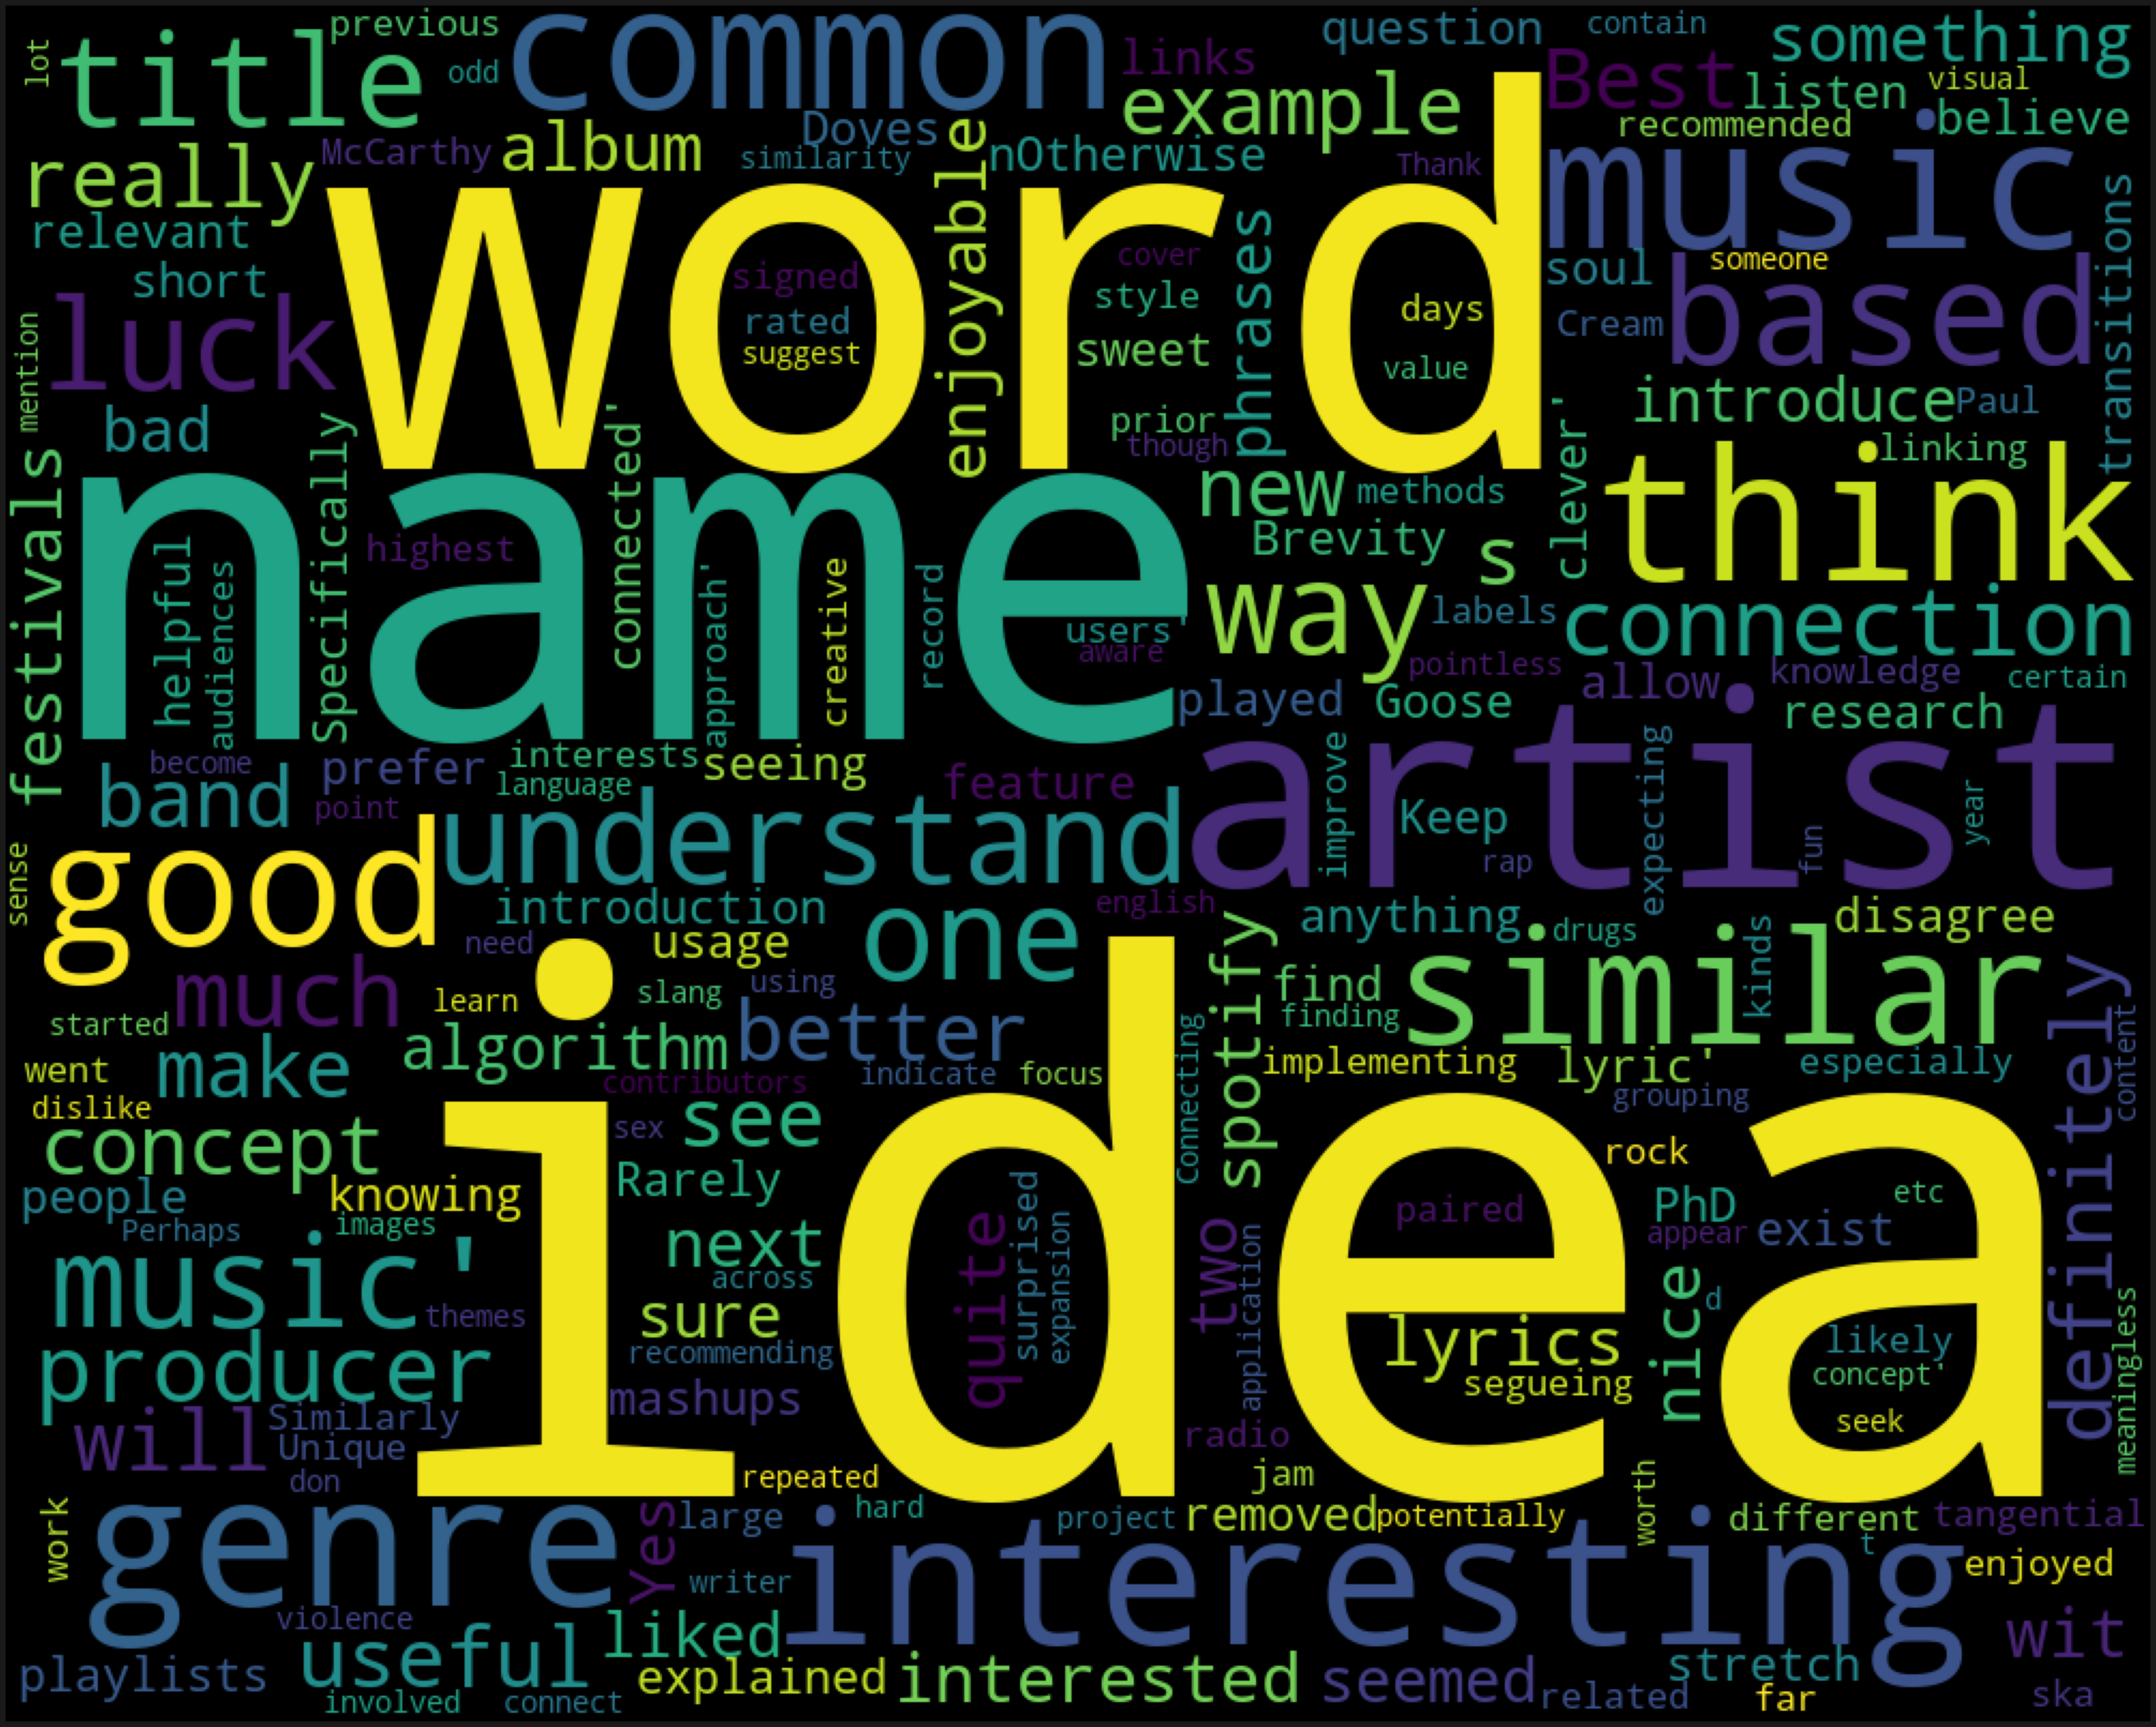

In [4]:
text = df.comment.values
wordcloud = WordCloud(
    width = 1000,
    height = 800,
    stopwords = STOPWORDS|set(['segue','segues','song', 'songs', 'rather', 'usually', 'bit', 'may', 'feel'])).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Let's analyze the comments.</br>
#### A possibility is to divide them in: positive, negative and neutral, according to the opinion expressed.

In [5]:
d = {
    0:'negative',
    1:'neutral',
    2:'positive',
    3:'positive',
    4:'neutral',
    5:'positive',
    6:'positive',
    7:'neutral',
    8:'positive',
    9:'neutral',
    10:'neutral',
    11:'neutral',
    12:'neutral',
    13:'positive',
    14:'positive',
    15:'positive',
    16:'neutral',
    17:'positive',
    18:'neutral',
    19:'negative',
    20:'positive',
    21:'positive',
    22:'positive',
    23:'negative',
    24:'neutral',
    25:'neutral',
    26:'neutral',
    27:'neutral',
    28:'positive',
}
category_p_n_n=pd.DataFrame({
    'comment_idx': list(d.keys()),
    'opinion on segues': list(d.values()),
})
df_category_p_n_n=df.set_index('comment_idx').join(category_p_n_n.set_index('comment_idx'), how='left').reset_index()
df_category_p_n_n.sort_values('user_category')

,comment_idx,user_idx,comment,user_category,opinion on segues
26,26,112,"I like the idea of segues. I think segues are much more useful when they focus on a common producer or song-writer, instead of more frivolous things like the titles of songs sharing words ( although that can be funny)",casual,neutral
25,25,104,"I like the idea and segues and they can definitely be useful for finding new songs but I think using visual images to connect songs is a bad idea. Connecting them through producers, music artists involved , genre or lyrics makes much more sense to me since the cover for an album can have no connection to why a song is enjoyable.",casual,neutral
23,23,89,I don’t understand the point of segues because a lot of the connections seemed pointless. It’s like a bad Spotify algorithm. I’d need to see it’s application to better understand it’s worth.,casual,negative
22,22,88,"I liked the segues, though some were hard to understand. Definitely a fun way to introduce a new song and learn more about music",casual,positive
0,0,1,"I didn't really understand why segues exist, it would be nice if you explained a bit more in the introduction.",mid,negative
24,24,101,Best of Luck!,mid,neutral
20,20,86,Segue by common contributors to songs is a good segue.,mid,positive
19,19,83,Really dislike the idea of grouping music by meaningless connections based on english language words rather than the content of the music,mid,negative
18,18,73,"I feel like segues based off similar song names or similar artist/band names is a bit odd. A similar word in the titles usually doesn't indicate similarity between the songs. Perhaps segues based off certain words that appear in the songs themselves could be a better idea since genres usually contain common themes. For example, rap music may mention sex, drugs, violence etc. There may be common slang or phrases that can be repeated across songs and so segues based off these phrases could be a good idea.",mid,neutral
17,17,69,I quite like the idea of segues. It's an interesting concept and something I feel like doing this will make me more aware of them or potentially seek them out. Thank you and good luck with your project.,mid,positive


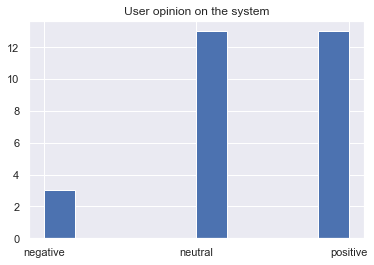

In [7]:
ax=df_category_p_n_n['opinion on segues'].hist()
_=ax.set_title('User opinion on the system')

The 4 nerds have opinion not much different from the 4 casuals. But careful, little numbers here!

<b>Careful</b>: Here we do ask opinion on both Dave and The Chain. So, the positive polarity might just depend on The Chain. Be careful claiming merits

<b>And, most importantly,</b> they were your students on commenting something associated to you. That would be the strongest confounding effect ... Maybe we won't brag about that bar plot ...

#### Let's see the influence of the familiarity in practice

In [13]:
print("Some comments highlight that segues can be more valuable if connecting user's music\n")
for i in [12, 27,]:
    print(f"- {df.loc[i].comment}\n")

Some comments highlight that segues can be more valuable if connecting user's music

- segues are in interesting idea but would work best when paired with prior knowledge of the users' genre interests so that recommended songs are likely to be enjoyed

- I think my lack of familiarity between the artists and songs made it difficult for me to appreciate the segues but if I were familiar I'm sure I would have understood them much more



#### Comments that highlight future directions

Segues to guide the creation of playlists and playlists that are enhanced with segues:

In [21]:
print(f"- {df.loc[5].comment}")

- I do like the idea and would be interested to listen to playlists of songs that are in some way connected


Segues for introducting new music to a listener (seed song is assumed known in the following):

In [27]:
for i in [6, 15,22, 25]:
    print(f"- {df.loc[i].comment}\n")

- i like the idea of segues, could be useful to find new music

- Interesting concept.  Segues are a good way to introduce audiences to different kinds of music that may not be in the same genres but have other connections to previous bands or songs.  Unique approach

- I liked the segues, though some were hard to understand. Definitely a fun way to introduce a new song and learn more about music

- I like the idea and segues and they can definitely be useful for finding new songs but I think using visual images to connect songs is a bad idea. Connecting them through producers, music artists involved , genre or lyrics makes much more sense to me since the cover for an album can have no connection to why a song is enjoyable.



#### The rest of the comments
- "I like the idea" or similar;
- Proposing segues we already have;
- Proposing something to do with lyrics. There is one suggesting to infer the theme of the lyrics and then link by that (e.g. two songs about war), the other were similar;
- "Keep segues short";
- "Word play segues are bad" or similar;
- "I don't like the idea" or similar